# HR Analytics Project- Understanding the Attrition in HR

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install mlrose
!pip install scikit-pyplot
import six
import sys
sys.modules['sklearn.externals.six']=six
import mlrose
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

ERROR: Could not find a version that satisfies the requirement scikit-pyplot
ERROR: No matching distribution found for scikit-pyplot


In [66]:
data=pd.read_csv('HR.csv')
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [5]:
data.shape

(141, 35)

In [6]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
data.describe()

Age    DailyRate  DistanceFromHome   Education  EmployeeCount  \
count  141.000000   141.000000        141.000000  141.000000          141.0   
mean    37.212766   861.794326          9.092199    2.858156            1.0   
std      9.766421   395.729336          8.182648    1.025263            0.0   
min     19.000000   103.000000          1.000000    1.000000            1.0   
25%     31.000000   542.000000          2.000000    2.000000            1.0   
50%     35.000000   853.000000          6.000000    3.000000            1.0   
75%     44.000000  1218.000000         14.000000    4.000000            1.0   
max     59.000000  1488.000000         29.000000    5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
count      141.000000               141.000000  141.000000      141.000000   
mean        92.290780                 2.539007   64.992908        2.687943   
std         54.084793                 1.079138   20.945677        0.718478   
min          1.000000                 1.000000   30.000000        1.000000   
25%         46.000000                 2.000000   48.000000        2.000000   
50%         91.000000                 3.000000   64.000000        3.000000   
75%        140.000000                 3.000000   82.000000        3.000000   
max        190.000000                 4.000000  100.000000        4.000000   

         JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  141.000000  ...                141.000000          141.0   
mean     2.042553  ...                  2.936170           80.0   
std      1.094612  ...                  1.057036            0.0   
min      1.000000  ...                  1.000000           80.0   
25%      1.000000  ...                  2.000000           80.0   
50%      2.000000  ...                  3.000000           80.0   
75%      3.000000  ...                  4.000000           80.0   
max      5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count        141.000000         141.000000             141.000000   
mean           0.680851          11.439716               2.716312   
std            0.847847           8.252592               1.277980   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            0.000000          10.000000               3.000000   
75%            1.000000          16.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count        141.00000      141.000000          141.000000   
mean           2.77305        7.042553            4.347518   
std            0.64773        6.889819            4.076038   
min            1.00000        0.000000            0.000000   
25%            2.00000        2.000000            2.000000   
50%            3.00000        5.000000            3.000000   
75%            3.00000       10.000000            7.000000   
max            4.00000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count               141.000000            141.000000  
mean                  2.297872              4.177305  
std                   3.415813              3.659203  
min                   0.000000              0.000000  
25%                   0.000000              1.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       141 non-null    int64 
 1   Attrition                 141 non-null    object
 2   BusinessTravel            141 non-null    object
 3   DailyRate                 141 non-null    int64 
 4   Department                141 non-null    object
 5   DistanceFromHome          141 non-null    int64 
 6   Education                 141 non-null    int64 
 7   EducationField            141 non-null    object
 8   EmployeeCount             141 non-null    int64 
 9   EmployeeNumber            141 non-null    int64 
 10  EnvironmentSatisfaction   141 non-null    int64 
 11  Gender                    141 non-null    object
 12  HourlyRate                141 non-null    int64 
 13  JobInvolvement            141 non-null    int64 
 14  JobLevel                  

# Analysis

In [9]:
col=['Attrition','BusinessTravel','Department','Education','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime',
     'DistanceFromHome','EmployeeNumber','EnvironmentSatisfaction','JobInvolvement','JobLevel','NumCompaniesWorked','PerformanceRating',
     'RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany',
     'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

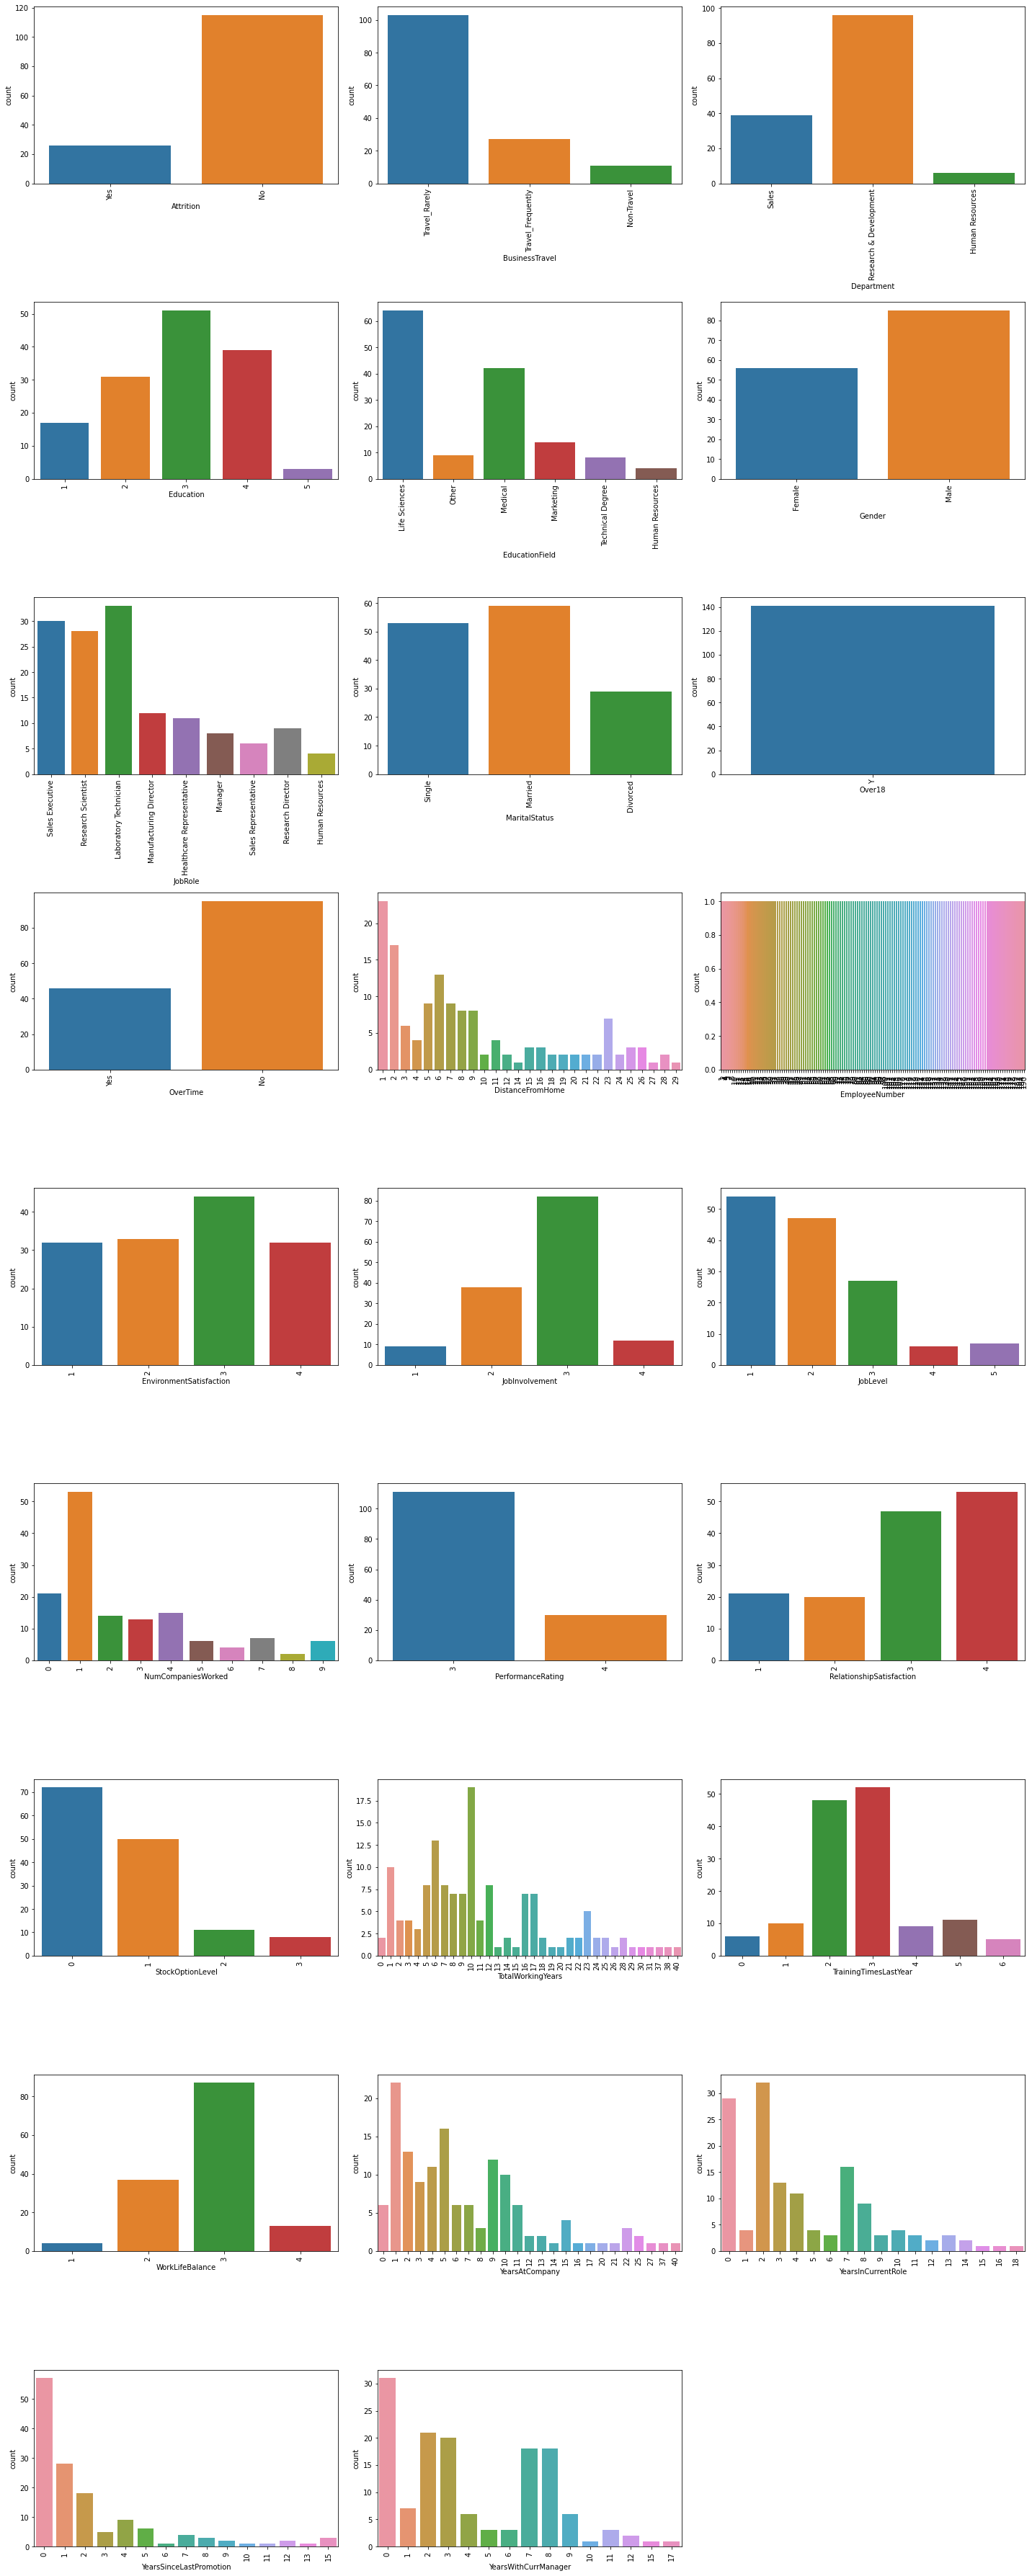

In [10]:
plt.figure(figsize=(20,55))
for i in range(0,len(col)):
  plt.subplot(10,3,i+1)
  sns.countplot(data[col[i]])
  plt.xticks(rotation=90)
  plt.tight_layout()

# Checking distribution curve of continuous columns

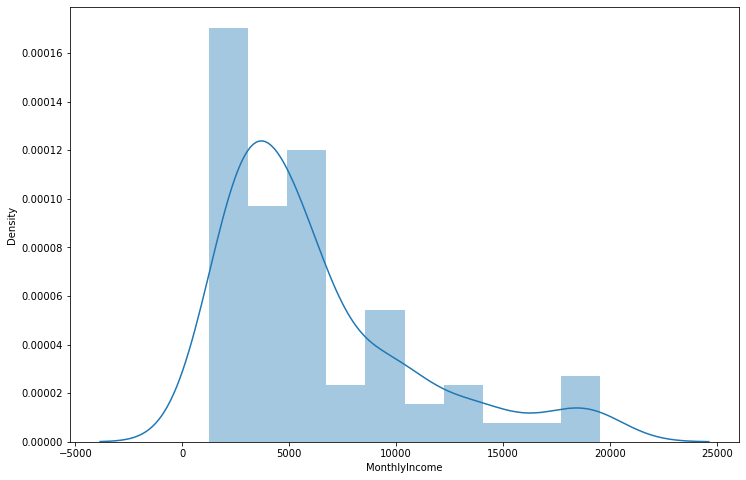

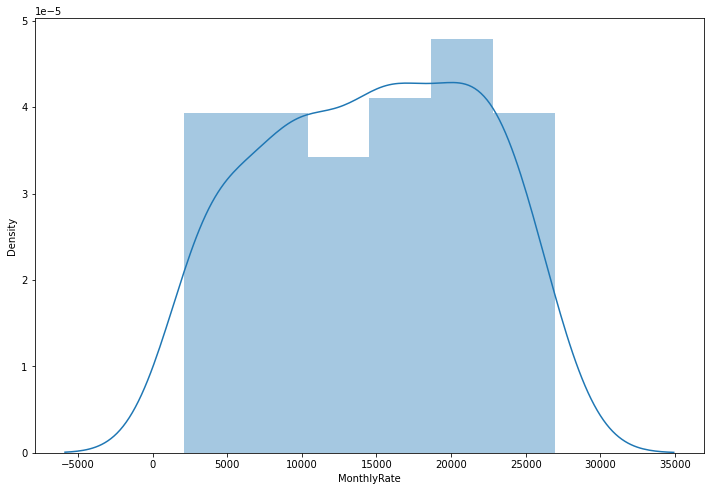

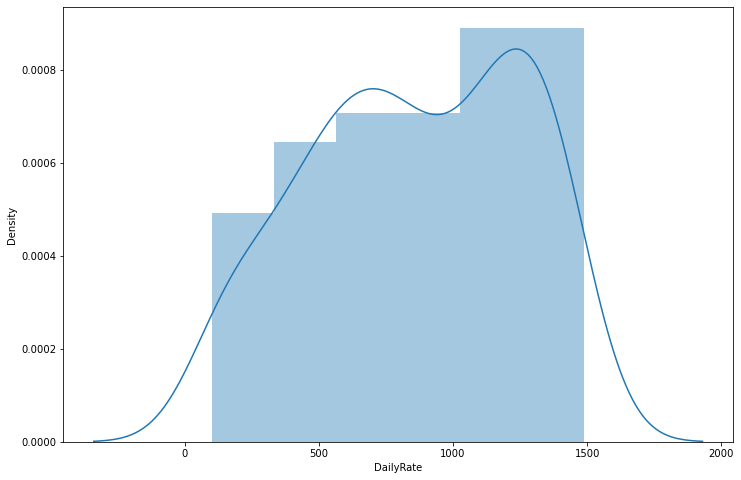

In [11]:
num_cols=['MonthlyIncome','MonthlyRate','DailyRate']
for i in range(0,len(num_cols)):
  plt.figure(figsize=(12,8))
  sns.distplot(data[num_cols[i]])
  plt.show()

# Quantitative analysis

In [12]:
all=['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']

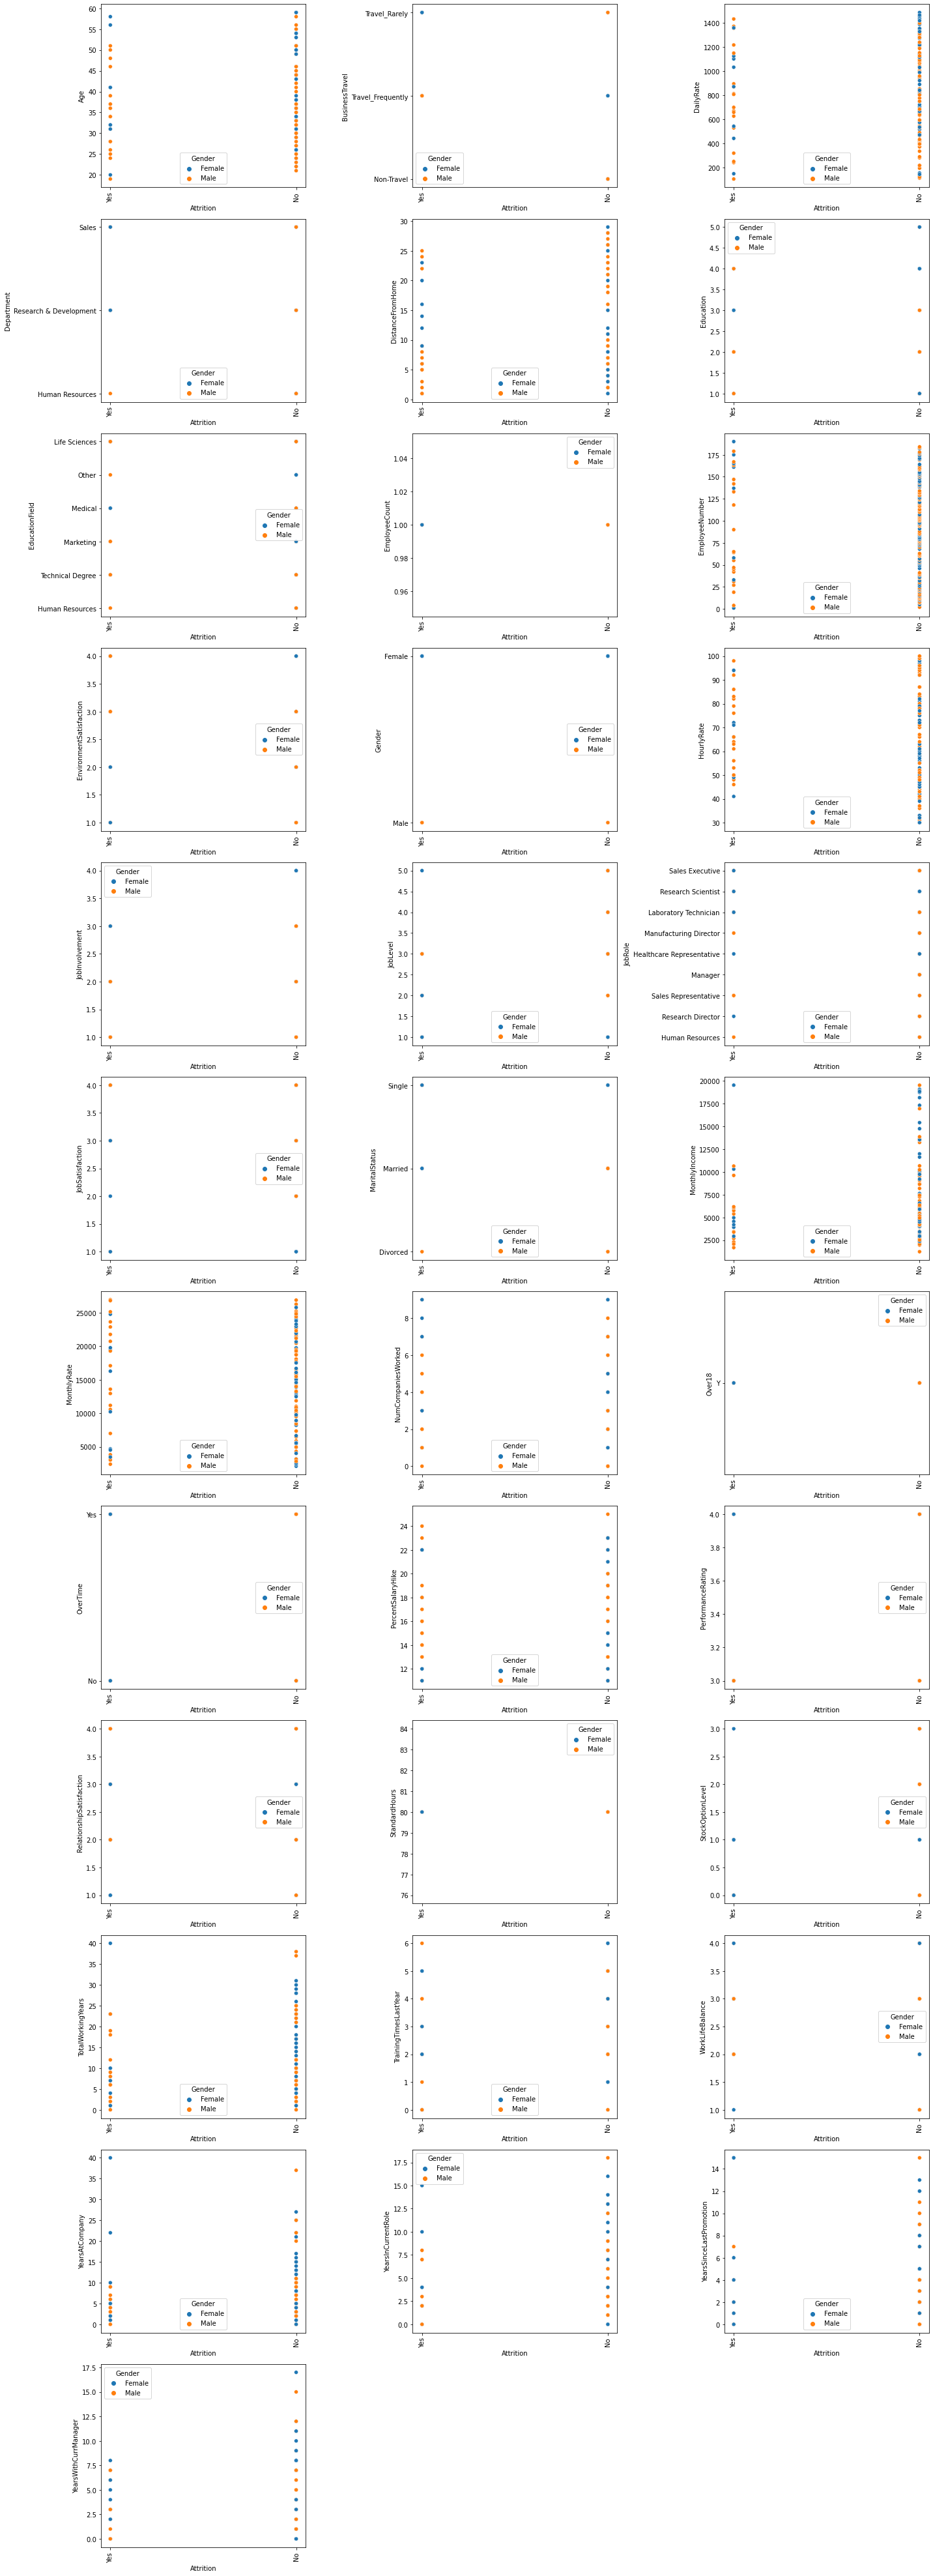

In [13]:
plt.figure(figsize=(20,55))
for i in range(0,len(all)):
  plt.subplot(12,3,i+1)
  sns.scatterplot(x=data['Attrition'],y=data[all[i]],hue=data['Gender'])
  plt.xticks(rotation=90)
  plt.tight_layout()


<AxesSubplot:xlabel='YearsAtCompany', ylabel='MonthlyIncome'>

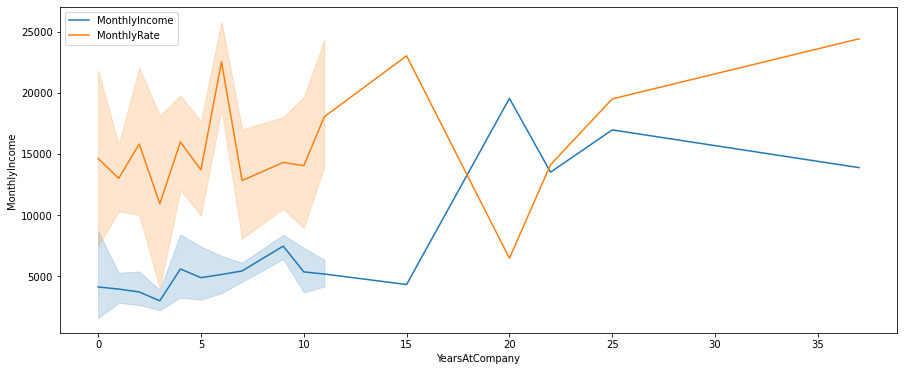

In [14]:
data_male=data.loc[data['Gender']=='Male'].set_index('YearsAtCompany')
data_female=data.loc[data['Gender']=='Female'].set_index('YearsAtCompany')
plt.figure(figsize=(15,6))
sns.lineplot(data=data_male['MonthlyIncome'],label='MonthlyIncome')
sns.lineplot(data=data_male['MonthlyRate'],label='MonthlyRate')

<AxesSubplot:xlabel='YearsAtCompany', ylabel='MonthlyIncome'>

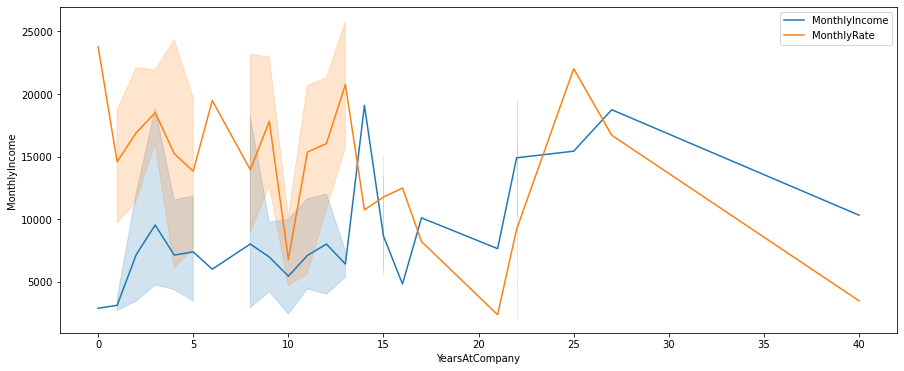

In [15]:
plt.figure(figsize=(15,6))
sns.lineplot(data=data_female['MonthlyIncome'],label='MonthlyIncome')
sns.lineplot(data=data_female['MonthlyRate'],label='MonthlyRate')

<AxesSubplot:xlabel='YearsAtCompany', ylabel='DailyRate'>

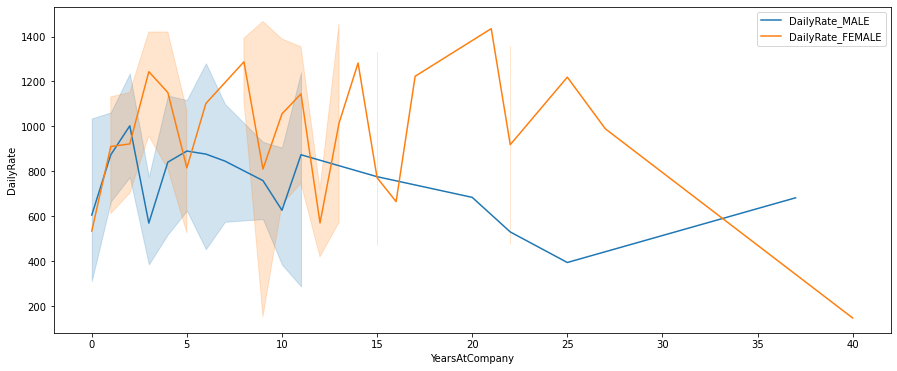

In [16]:
plt.figure(figsize=(15,6))
sns.lineplot(data=data_male['DailyRate'],label='DailyRate_MALE')
sns.lineplot(data=data_female['DailyRate'],label='DailyRate_FEMALE')

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

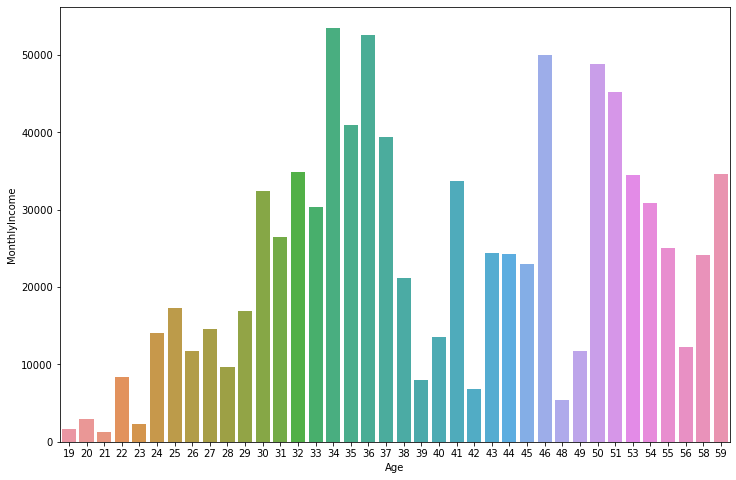

In [17]:
data1=data.groupby('Age')['MonthlyIncome'].sum()
data1=data1.reset_index()
data1=data1.sort_values(by=['MonthlyIncome'],ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x='Age',y='MonthlyIncome',data=data1)

<AxesSubplot:xlabel='Age', ylabel='MonthlyRate'>

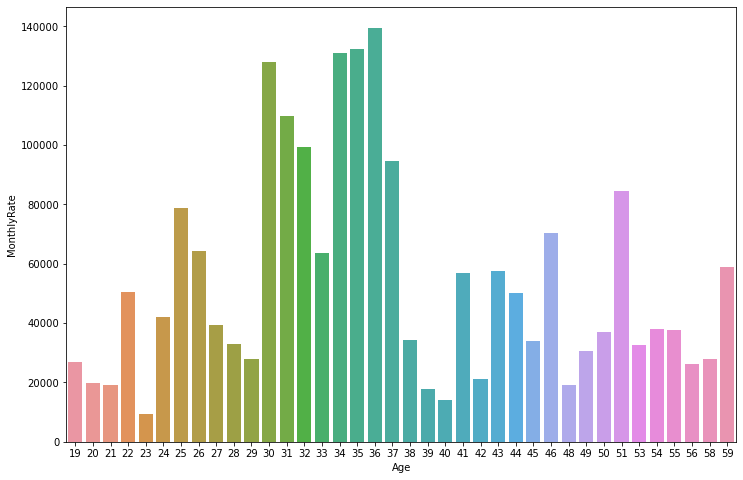

In [18]:
data2=data.groupby('Age')['MonthlyRate'].sum()
data2=data2.reset_index()
data2=data2.sort_values(by=['MonthlyRate'],ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x='Age',y='MonthlyRate',data=data2)

Text(0.5, 1.0, 'Department wise monthlyincome on bases of educationfield')

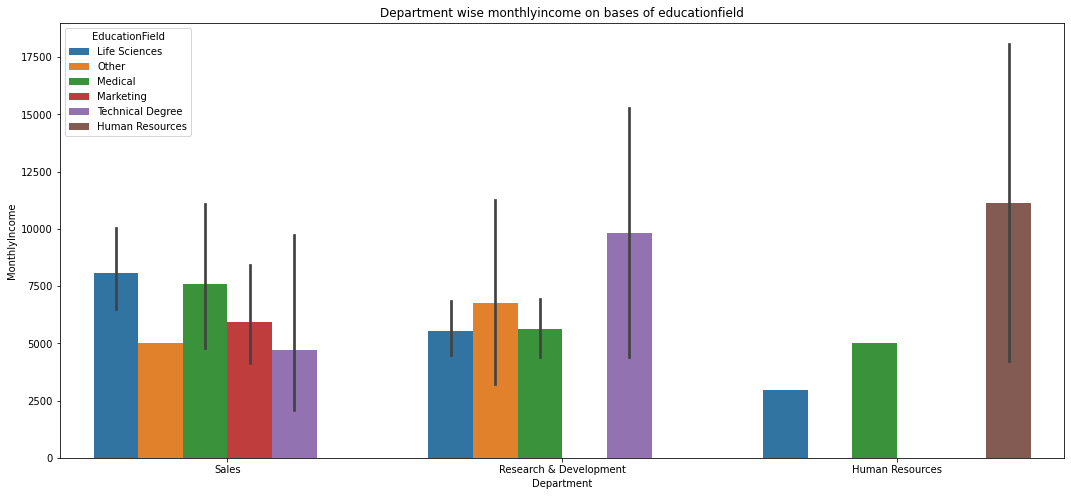

In [19]:
plt.figure(figsize=(18,8))
sns.barplot(x='Department',y='MonthlyIncome',data=data,hue='EducationField')
plt.title("Department wise monthlyincome on bases of educationfield")

<AxesSubplot:xlabel='BusinessTravel', ylabel='MonthlyIncome'>

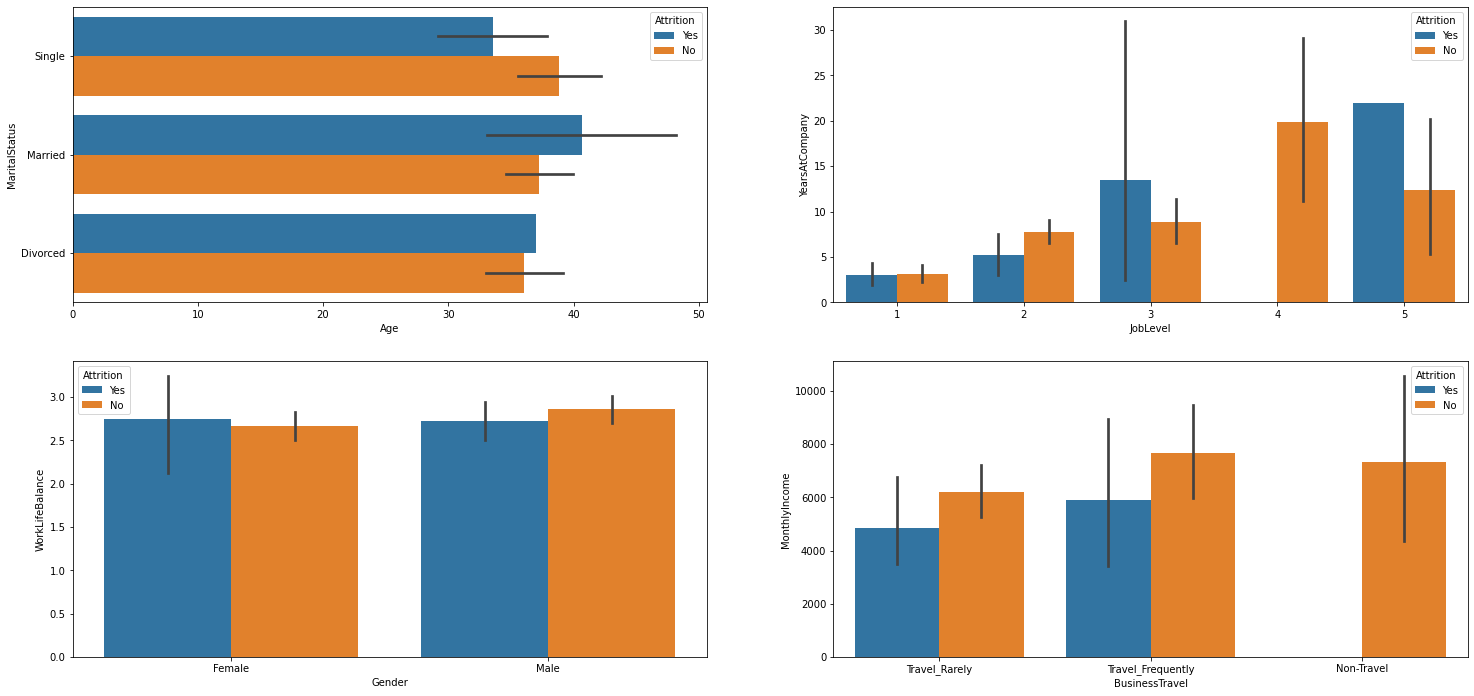

In [20]:
plt.figure(figsize=(25,25))
plt.subplot(4,2,1)
sns.barplot(y='MaritalStatus',x='Age',data=data,hue='Attrition')
plt.subplot(4,2,2)
sns.barplot(y='YearsAtCompany',x='JobLevel',data=data,hue='Attrition')
plt.subplot(4,2,3)
sns.barplot(y='WorkLifeBalance',x='Gender',data=data,hue='Attrition')
plt.subplot(4,2,4)
sns.barplot(y='MonthlyIncome',x='BusinessTravel',data=data,hue='Attrition')

In [21]:
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [22]:
data_obj=data.select_dtypes(include=['object'])
data_obj

Attrition     BusinessTravel              Department   EducationField  \
0         Yes      Travel_Rarely                   Sales    Life Sciences   
1          No  Travel_Frequently  Research & Development    Life Sciences   
2         Yes      Travel_Rarely  Research & Development            Other   
3          No  Travel_Frequently  Research & Development    Life Sciences   
4          No      Travel_Rarely  Research & Development          Medical   
..        ...                ...                     ...              ...   
136       Yes  Travel_Frequently  Research & Development    Life Sciences   
137        No      Travel_Rarely                   Sales    Life Sciences   
138        No      Travel_Rarely                   Sales    Life Sciences   
139        No      Travel_Rarely         Human Resources  Human Resources   
140       Yes      Travel_Rarely  Research & Development          Medical   

     Gender                 JobRole MaritalStatus Over18 OverTime  
0    Female         Sales Executive        Single      Y      Yes  
1      Male      Research Scientist       Married      Y       No  
2      Male   Laboratory Technician        Single      Y      Yes  
3    Female      Research Scientist       Married      Y      Yes  
4      Male   Laboratory Technician       Married      Y       No  
..      ...                     ...           ...    ...      ...  
136    Male  Manufacturing Director        Single      Y       No  
137  Female         Sales Executive       Married      Y       No  
138    Male         Sales Executive       Married      Y       No  
139    Male         Human Resources       Married      Y      Yes  
140  Female   Laboratory Technician        Single      Y       No  

[141 rows x 9 columns]

In [23]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [24]:
def ordinal_encode(df,column):
  df[column]=oe.fit_transform(df[column])
  return df
data=ordinal_encode(data,['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime'])
def preporcessing(df):
  df=df.copy()
  X=df.drop('Attrition',axis=1)
  y=df['Attrition']
  return X,y
X,y=preporcessing(data)
X

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0     41             2.0       1102         2.0                 1          2   
1     49             1.0        279         1.0                 8          1   
2     37             2.0       1373         1.0                 2          2   
3     33             1.0       1392         1.0                 3          4   
4     27             2.0        591         1.0                 2          1   
..   ...             ...        ...         ...               ...        ...   
136   51             1.0       1150         1.0                 8          4   
137   39             2.0       1329         2.0                 4          4   
138   25             2.0        959         2.0                28          3   
139   30             2.0       1240         0.0                 9          3   
140   32             2.0       1033         1.0                 9          3   

     EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  \
0               1.0              1               1                        2   
1               1.0              1               2                        3   
2               4.0              1               4                        4   
3               1.0              1               5                        4   
4               3.0              1               7                        1   
..              ...            ...             ...                      ...   
136             1.0              1             179                        1   
137             1.0              1             182                        4   
138             1.0              1             183                        1   
139             0.0              1             184                        3   
140             3.0              1             190                        1   

     ...  RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0    ...                         1             80                 0   
1    ...                         4             80                 1   
2    ...                         2             80                 0   
3    ...                         3             80                 0   
4    ...                         4             80                 1   
..   ...                       ...            ...               ...   
136  ...                         4             80                 0   
137  ...                         3             80                 1   
138  ...                         4             80                 0   
139  ...                         4             80                 0   
140  ...                         1             80                 0   

     TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                    8                      0                1   
1                   10                      3                3   
2                    7                      3                3   
3                    8                      3                3   
4                    6                      3                3   
..                 ...                    ...              ...   
136                 18                      2                3   
137                 17                      1                4   
138                  6                      3                3   
139                 12                      2                1   
140                 10                      2                4   

     YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                 6                   4                        0   
1                10                   7                        1   
2                 0                   0                        0   
3                 8                   7                        3   
4                 2                   2                        2   
..              ...                 ...  

In [25]:
X.drop(['EmployeeNumber','Over18','StandardHours'],axis=1,inplace=True)

# Multi-variate Analysis

<AxesSubplot:>

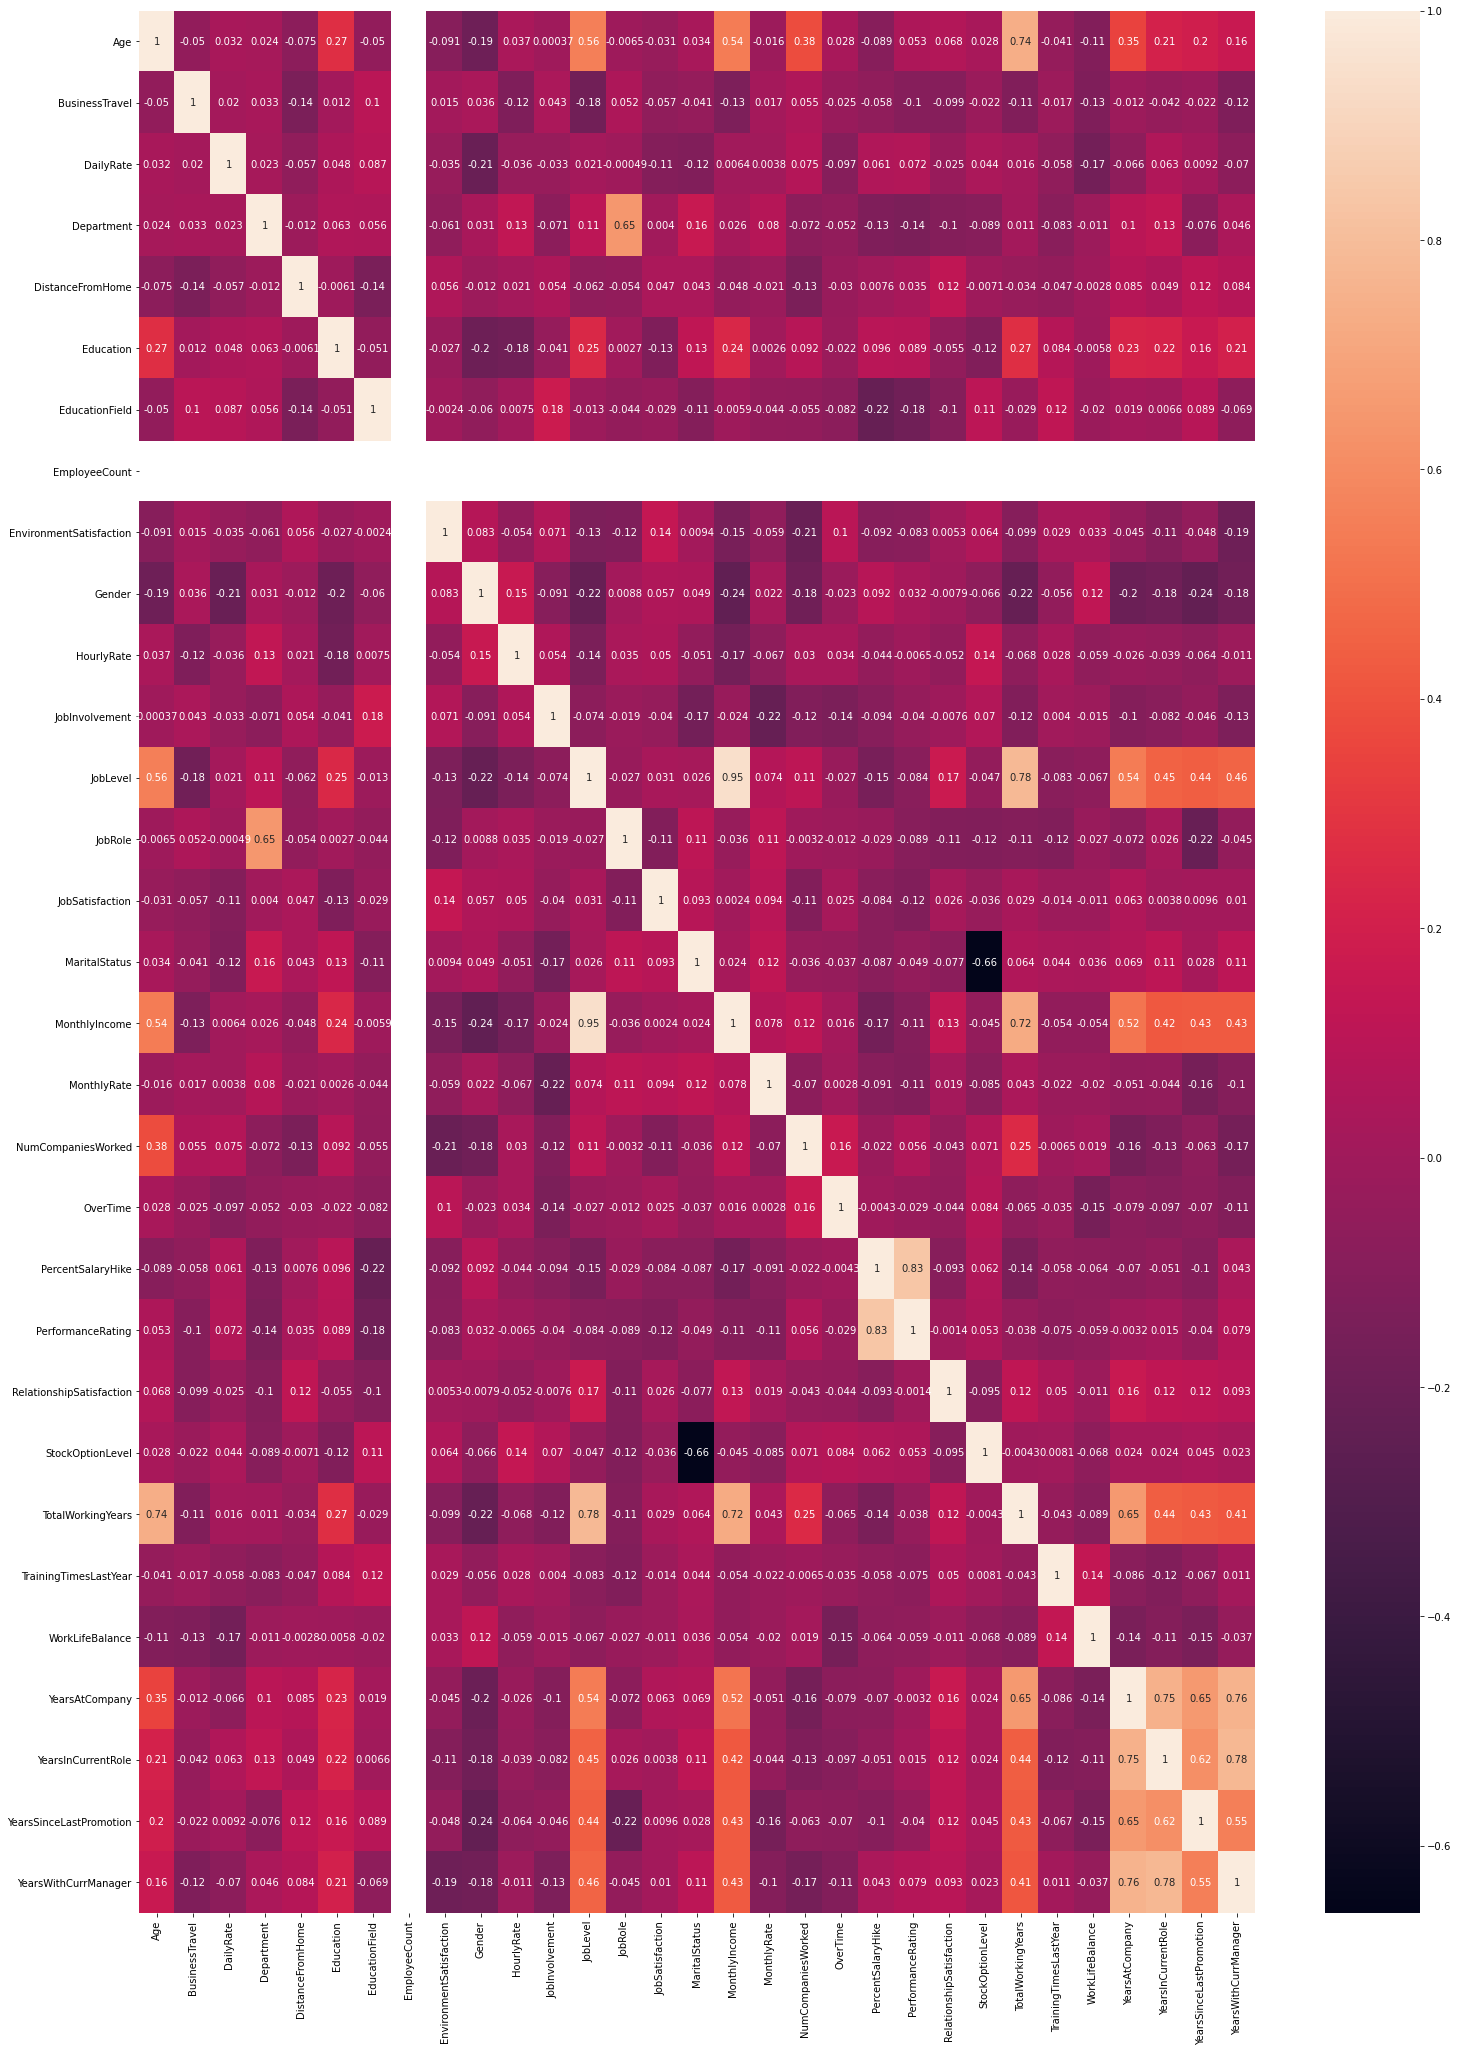

In [26]:
X_corr=X.corr()
plt.figure(figsize=(25,35))
sns.heatmap(X_corr,annot=True)

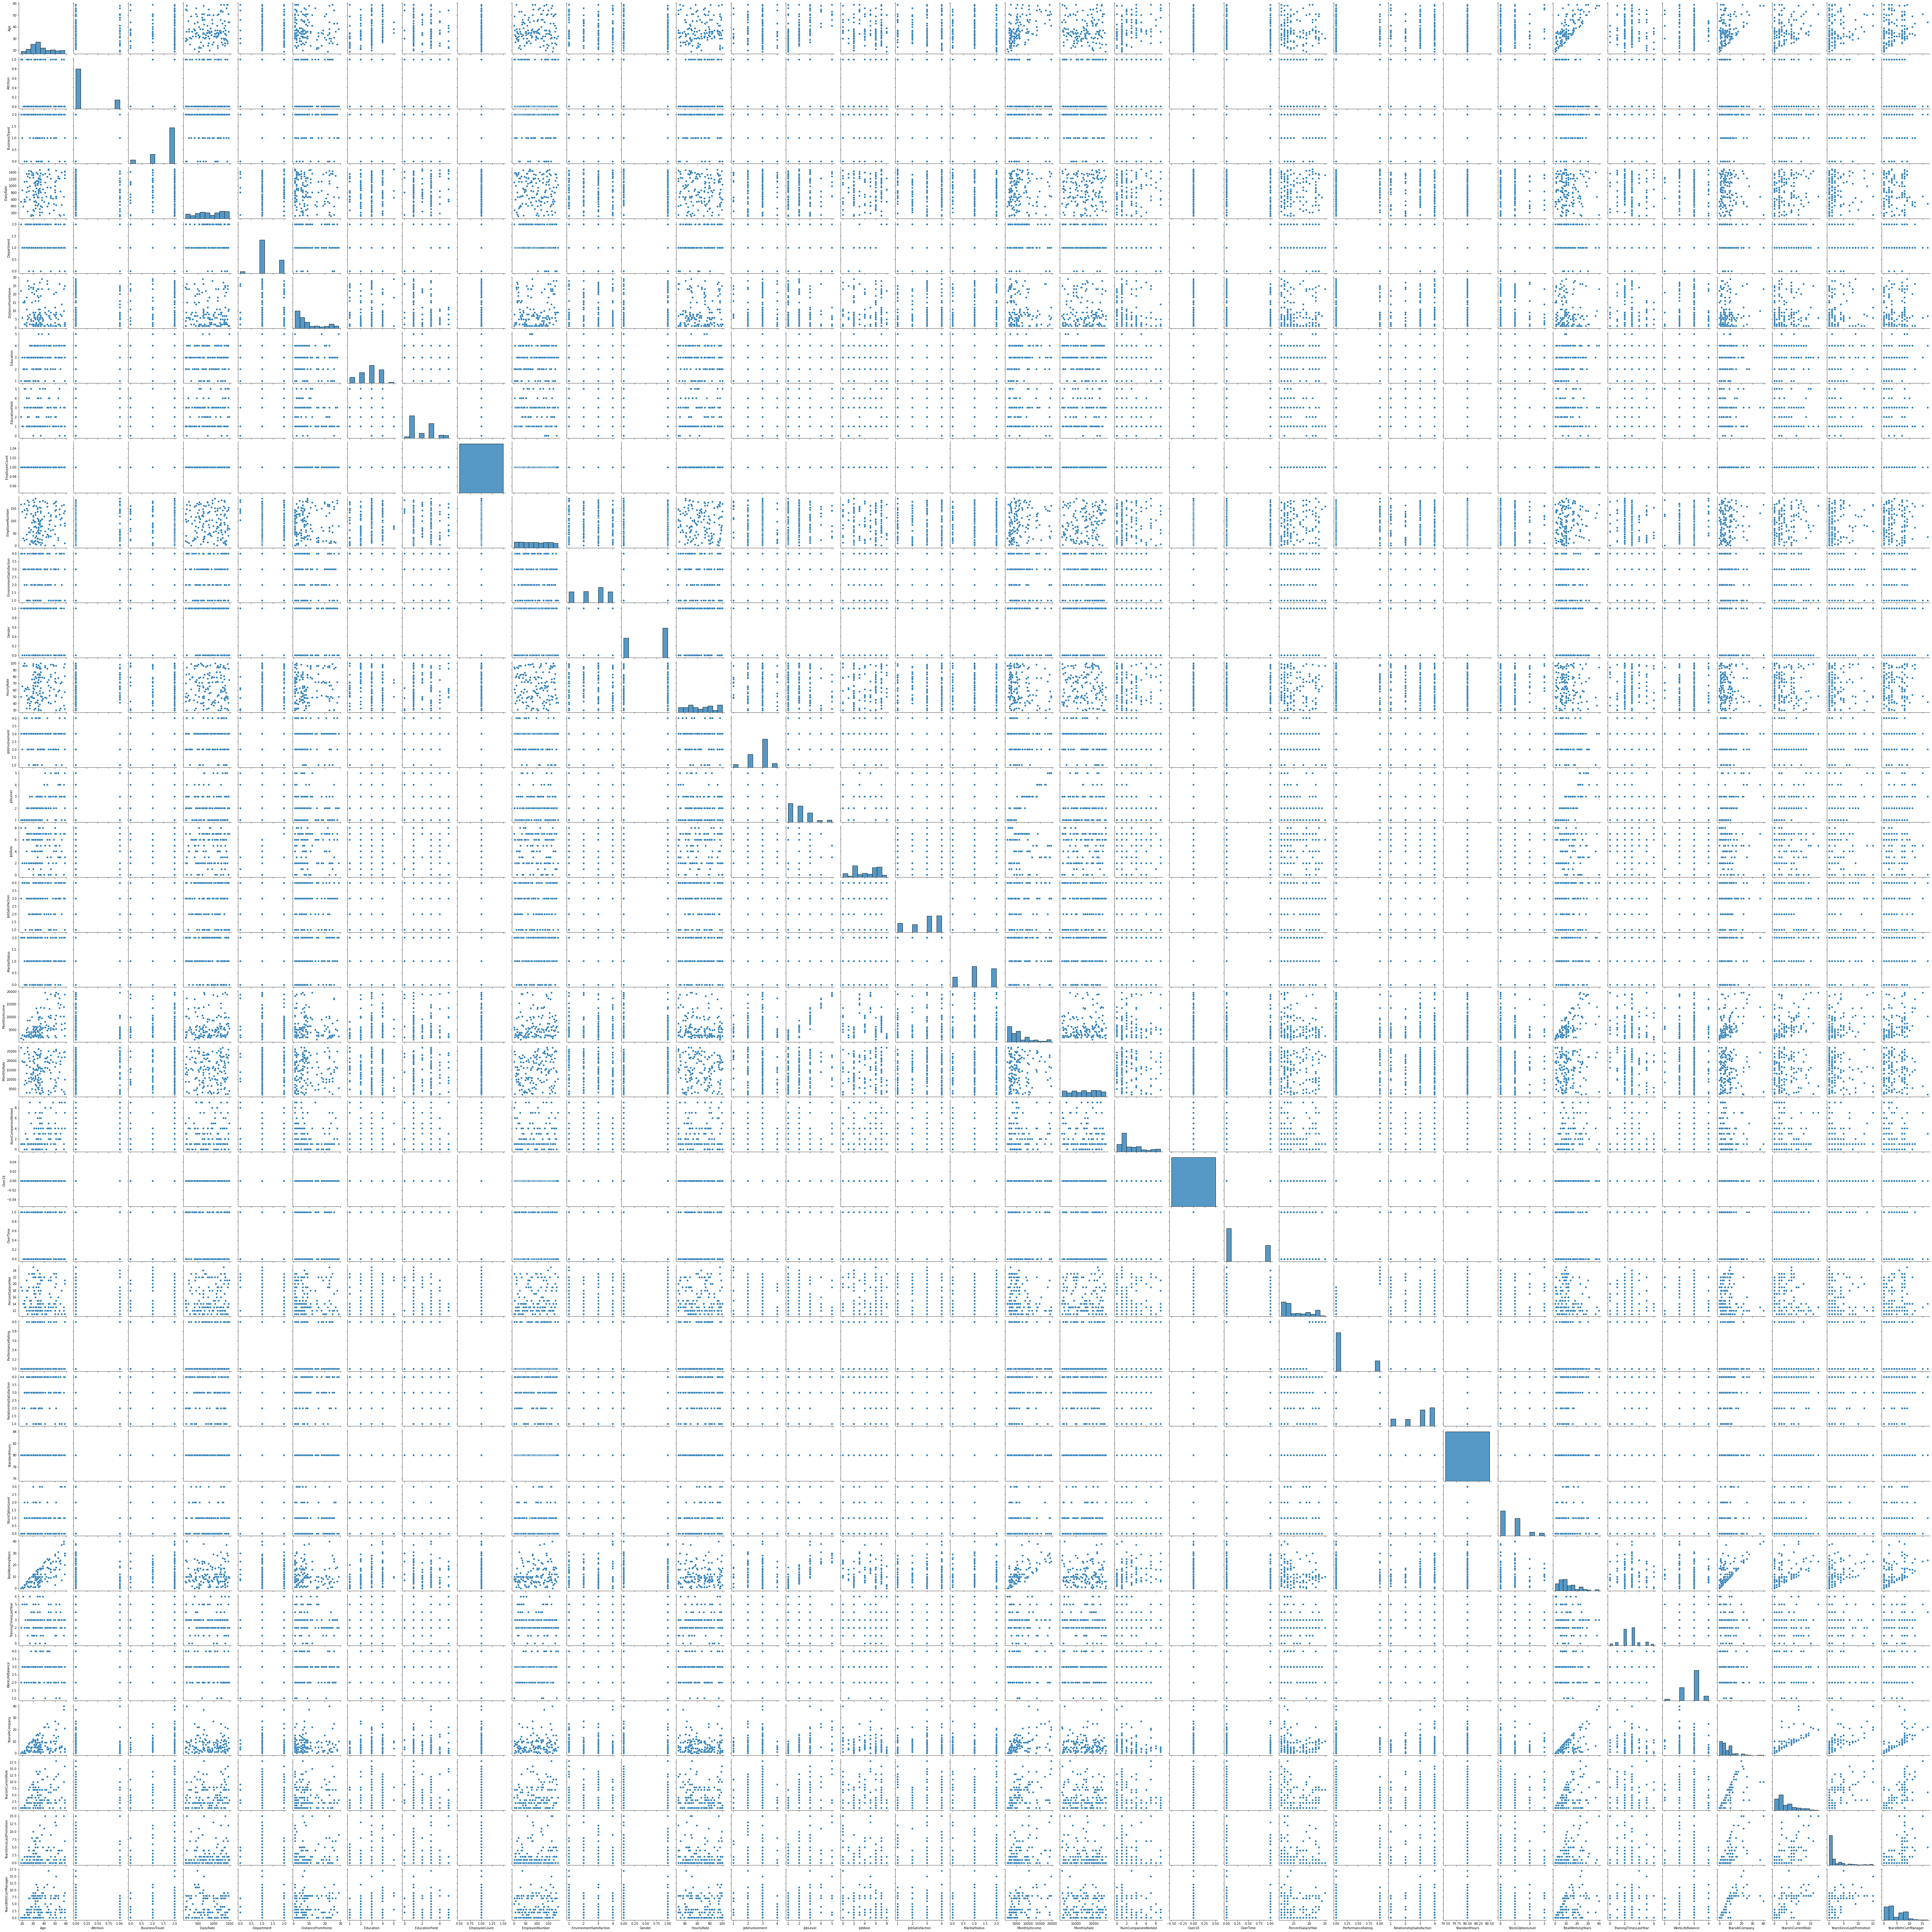

In [27]:
sns.pairplot(data)

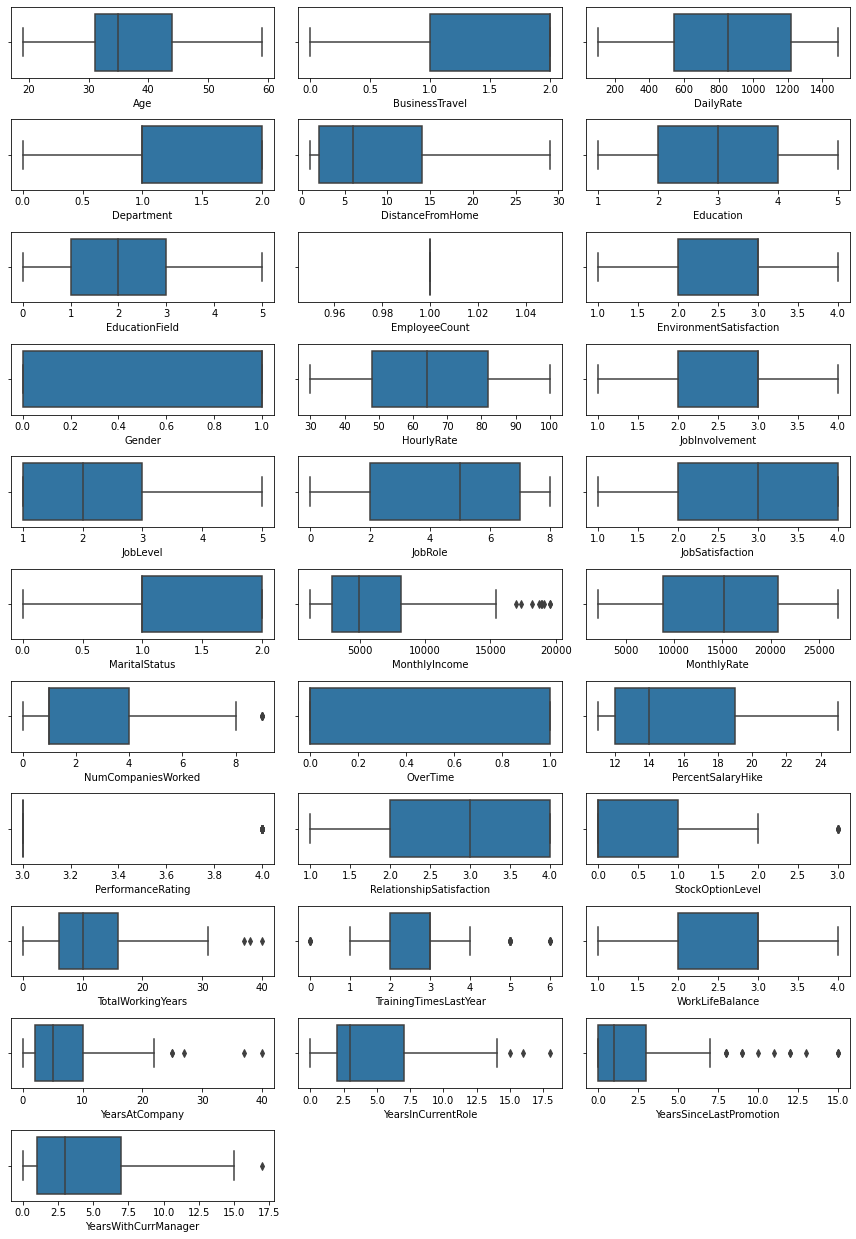

In [28]:
X_out=X.columns.values
plt.figure(figsize=(12,20))
for i in range(0,len(X_out)):
  plt.subplot(13,3,i+1)
  sns.boxplot(X[X_out[i]])
  plt.tight_layout()

# Replacing outliers with percentile method so we dont loose data

In [29]:
for col in X.columns:
  percentile=X[col].quantile([0.01,0.98]).values
  X[col][X[col]<=percentile[0]]=percentile[0]
  X[col][X[col]>=percentile[1]]=percentile[1]

# After removing outliers

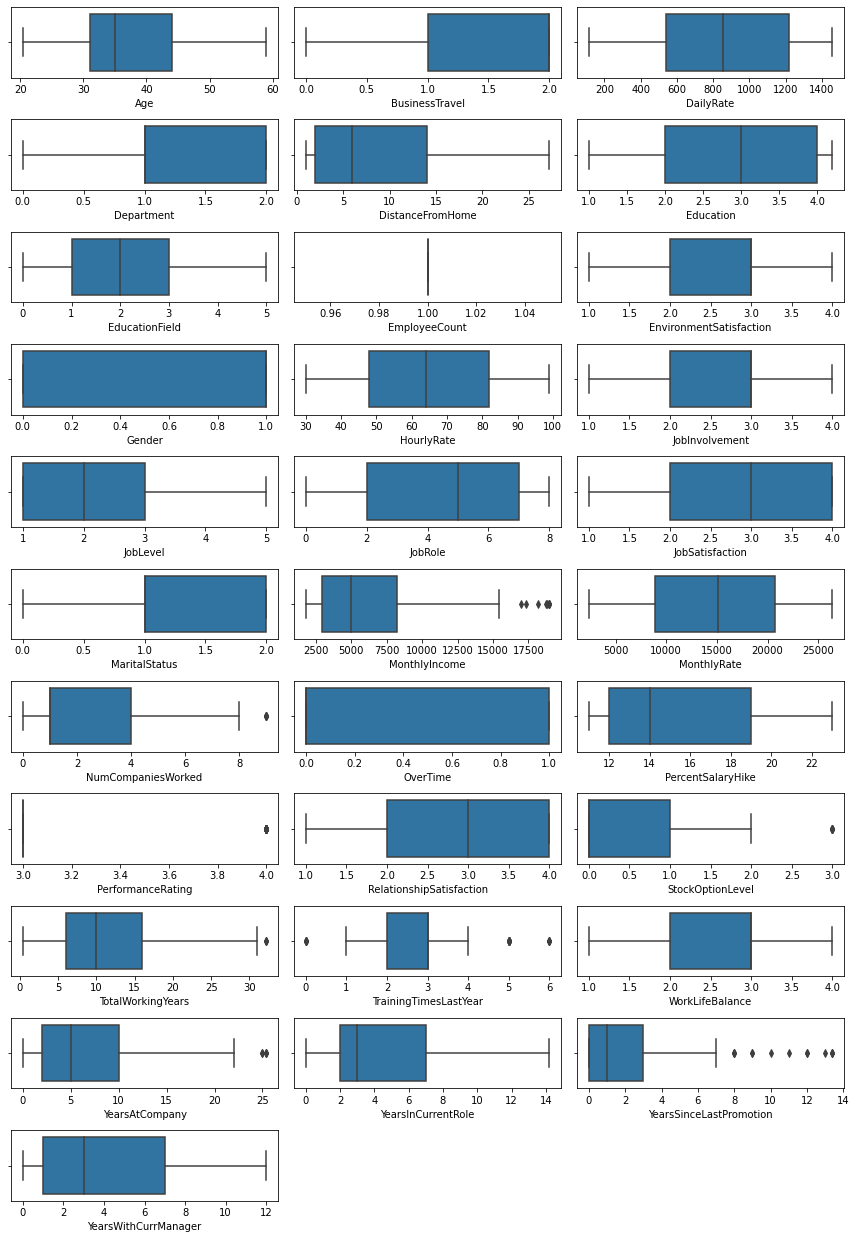

In [30]:
X_out=X.columns.values
plt.figure(figsize=(12,20))
for i in range(0,len(X_out)):
  plt.subplot(13,3,i+1)
  sns.boxplot(X[X_out[i]])
  plt.tight_layout()

In [31]:
!pip install pingouin
import pingouin as pg

In [32]:
pg.linear_regression(X,y)

names      coef        se         T      pval  \
0                  Intercept  0.396709  0.500035  0.793362  0.429275   
1                        Age  0.001083  0.005085  0.213079  0.831660   
2             BusinessTravel  0.093221  0.052410  1.778709  0.078050   
3                  DailyRate -0.000050  0.000081 -0.619821  0.536658   
4                 Department  0.013075  0.085052  0.153735  0.878101   
5           DistanceFromHome  0.004539  0.003802  1.193873  0.235096   
6                  Education  0.009561  0.033273  0.287346  0.774388   
7             EducationField  0.039124  0.025176  1.554033  0.123049   
8    EnvironmentSatisfaction -0.023718  0.030008 -0.790381  0.431006   
9                     Gender -0.004182  0.067671 -0.061803  0.950832   
10                HourlyRate  0.001991  0.001550  1.284193  0.201773   
11            JobInvolvement -0.173823  0.046473 -3.740275  0.000294   
12                  JobLevel -0.047798  0.107260 -0.445629  0.656741   
13                   JobRole  0.006842  0.017340  0.394596  0.693905   
14           JobSatisfaction  0.001970  0.028059  0.070194  0.944167   
15             MaritalStatus  0.106410  0.057718  1.843623  0.067930   
16             MonthlyIncome  0.000005  0.000023  0.202005  0.840286   
17               MonthlyRate -0.000005  0.000005 -1.183543  0.239145   
18        NumCompaniesWorked  0.004429  0.015924  0.278115  0.781447   
19                  OverTime  0.243344  0.067961  3.580644  0.000512   
20         PercentSalaryHike  0.016887  0.014445  1.169013  0.244925   
21         PerformanceRating -0.113165  0.136753 -0.827511  0.409739   
22  RelationshipSatisfaction  0.000355  0.030907  0.011479  0.990862   
23          StockOptionLevel -0.047490  0.049825 -0.953138  0.342610   
24         TotalWorkingYears -0.001108  0.009524 -0.116343  0.907593   
25     TrainingTimesLastYear -0.027004  0.024759 -1.090679  0.277797   
26           WorkLifeBalance  0.020263  0.048950  0.413950  0.679717   
27            YearsAtCompany -0.000221  0.012869 -0.017199  0.986309   
28        YearsInCurrentRole -0.009457  0.014519 -0.651380  0.516160   
29   YearsSinceLastPromotion  0.019122  0.013163  1.452675  0.149161   
30      YearsWithCurrManager -0.017258  0.018590 -0.928375  0.355246   

          r2   adj_r2  CI[2.5%]  CI[97.5%]  
0   0.392792  0.22719 -0.594243   1.387661  
1   0.392792  0.22719 -0.008993   0.011160  
2   0.392792  0.22719 -0.010642   0.197085  
3   0.392792  0.22719 -0.000209   0.000110  
4   0.392792  0.22719 -0.155478   0.181629  
5   0.392792  0.22719 -0.002996   0.012075  
6   0.392792  0.22719 -0.056378   0.075499  
7   0.392792  0.22719 -0.010768   0.089017  
8   0.392792  0.22719 -0.083188   0.035752  
9   0.392792  0.22719 -0.138290   0.129925  
10  0.392792  0.22719 -0.001081   0.005063  
11  0.392792  0.22719 -0.265923  -0.081724  
12  0.392792  0.22719 -0.260362   0.164766  
13  0.392792  0.22719 -0.027522   0.041207  
14  0.392792  0.22719 -0.053637   0.057576  
15  0.392792  0.22719 -0.007973   0.220794  
16  0.392792  0.22719 -0.000041   0.000050  
17  0.392792  0.22719 -0.000014   0.000004  
18  0.392792  0.22719 -0.027129   0.035987  
19  0.392792  0.22719  0.108661   0.378026  
20  0.392792  0.22719 -0.011741   0.045515  
21  0.392792  0.22719 -0.384178   0.157848  
22  0.392792  0.22719 -0.060896   0.061605  
23  0.392792  0.22719 -0.146232   0.051252  
24  0.392792  0.22719 -0.019982   0.017766  
25  0.392792  0.22719 -0.076069   0.022062  
26  0.392792  0.22719 -0.076744   0.117269  
27  0.392792  0.22719 -0.025724   0.025281  
28  0.392792  0.22719 -0.038230   0.019316  
29  0.392792  0.22719 -0.006965   0.045209  
30  0.392792  0.22719 -0.054098   0.019582

# Checking skewness

In [33]:
X.skew()

Age                         0.564315
BusinessTravel             -1.598709
DailyRate                  -0.223465
Department                  0.264711
DistanceFromHome            0.951263
Education                  -0.412063
EducationField              0.607757
EmployeeCount               0.000000
EnvironmentSatisfaction    -0.102120
Gender                     -0.424867
HourlyRate                  0.052038
JobInvolvement             -0.509084
JobLevel                    1.041787
JobRole                    -0.264774
JobSatisfaction            -0.472524
MaritalStatus              -0.287633
MonthlyIncome               1.421234
MonthlyRate                -0.106519
NumCompaniesWorked          1.206729
OverTime                    0.749228
PercentSalaryHike           0.647464
PerformanceRating           1.418802
RelationshipSatisfaction   -0.644222
StockOptionLevel            1.235672
TotalWorkingYears           0.889473
TrainingTimesLastYear       0.485361
WorkLifeBalance            -0.382874
Y

In [34]:
from sklearn.preprocessing import power_transform,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,StratifiedKFold
x=X

# Removing Skewness

In [35]:
X_new=power_transform(X,method='yeo-johnson')
X_new=pd.DataFrame(X_new,columns=x.columns)

# Balancing the imbalance datasheet

In [36]:
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X_new,y)
X_new=pd.DataFrame(X_res,columns=x.columns)
y_new=pd.DataFrame(y_res,columns=['Attrition'])
X_new.skew()

Age                         0.063259
BusinessTravel             -1.429888
DailyRate                  -0.145065
Department                  0.066551
DistanceFromHome           -0.187622
Education                  -0.117340
EducationField              0.074414
EmployeeCount               0.000000
EnvironmentSatisfaction    -0.017553
Gender                     -0.733927
HourlyRate                  0.010049
JobInvolvement              0.193519
JobLevel                    0.310401
JobRole                    -0.297962
JobSatisfaction            -0.354327
MaritalStatus              -0.697283
MonthlyIncome               0.253052
MonthlyRate                -0.167184
NumCompaniesWorked          0.050393
OverTime                    0.217792
PercentSalaryHike           0.292087
PerformanceRating           1.853307
RelationshipSatisfaction   -0.221737
StockOptionLevel            0.789622
TotalWorkingYears           0.119697
TrainingTimesLastYear       0.153998
WorkLifeBalance             0.010845
Y

# Difference between imbalanced and balanced data

Text(0.5, 1.0, 'Balanced data')

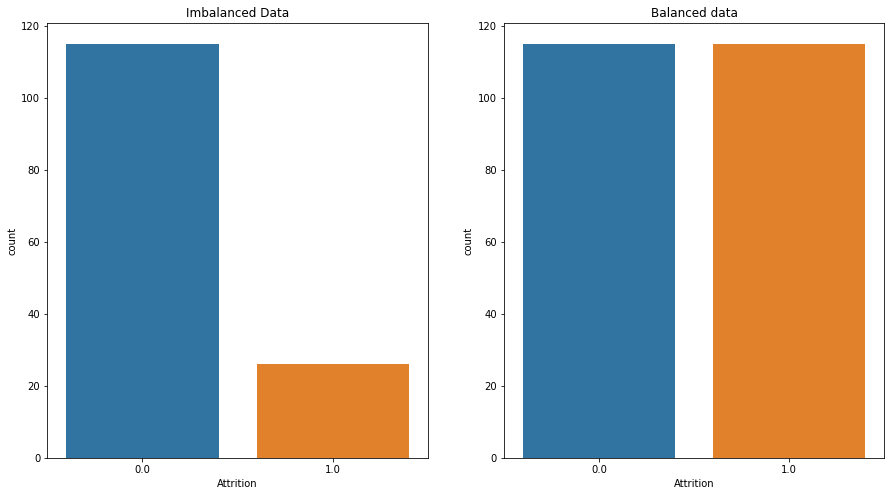

In [37]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.countplot(data['Attrition'])
plt.title("Imbalanced Data")
plt.subplot(1,2,2)
sns.countplot(y_new['Attrition'])
plt.title("Balanced data")

# Feature Scaling

In [38]:
scaler=StandardScaler()
X_new=scaler.fit_transform(X_new)
X_new=pd.DataFrame(X_new,columns=(x.columns))
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.3,random_state=42)

In [40]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
!pip install scikit-plot
import scikitplot as skplt

In [41]:
skf=StratifiedKFold(n_splits=5)


# Training multiple models

In [43]:
models={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeRegressor":DecisionTreeClassifier(),
    "ExtraTreesRegressor":ExtraTreesClassifier(),
    "RandomForestRegressor":RandomForestClassifier(),
    "KNeighborsRegressor":KNeighborsClassifier()
}

*************************************************** LogisticRegression ************************************************************


Accuracy_Score 0.7971014492753623


SCORE 0.7971014492753623


Confusion metrics


[[29  7]
 [ 7 26]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81        36
         1.0       0.79      0.79      0.79        33

    accuracy                           0.80        69
   macro avg       0.80      0.80      0.80        69
weighted avg       0.80      0.80      0.80        69

Cross_Val_Score 0.8382575757575758


MODEL LEARNING CURVE


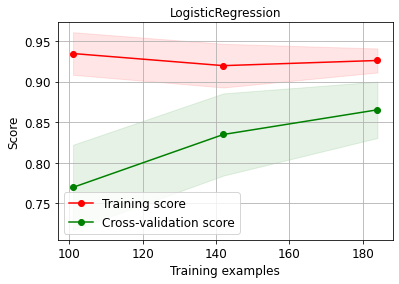

*************************************************** DecisionTreeRegressor ************************************************************


Accuracy_Score 0.8115942028985508


SCORE 0.8115942028985508


Confusion metrics


[[30  6]
 [ 7 26]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82        36
         1.0       0.81      0.79      0.80        33

    accuracy                           0.81        69
   macro avg       0.81      0.81      0.81        69
weighted avg       0.81      0.81      0.81        69

Cross_Val_Score 0.8073863636363636


MODEL LEARNING CURVE


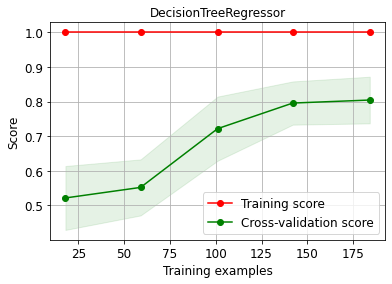

*************************************************** ExtraTreesRegressor ************************************************************


Accuracy_Score 0.9565217391304348


SCORE 0.9565217391304348


Confusion metrics


[[34  2]
 [ 1 32]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96        36
         1.0       0.94      0.97      0.96        33

    accuracy                           0.96        69
   macro avg       0.96      0.96      0.96        69
weighted avg       0.96      0.96      0.96        69

Cross_Val_Score 0.9441287878787878


MODEL LEARNING CURVE


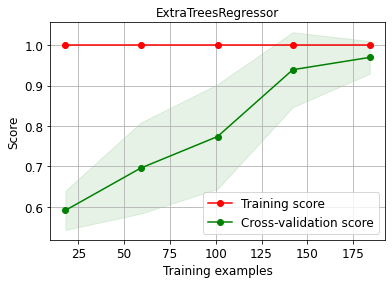

*************************************************** RandomForestRegressor ************************************************************


Accuracy_Score 0.9130434782608695


SCORE 0.9130434782608695


Confusion metrics


[[34  2]
 [ 4 29]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.89      0.94      0.92        36
         1.0       0.94      0.88      0.91        33

    accuracy                           0.91        69
   macro avg       0.92      0.91      0.91        69
weighted avg       0.91      0.91      0.91        69

Cross_Val_Score 0.9255681818181818


MODEL LEARNING CURVE


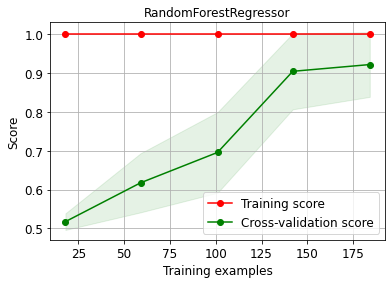

*************************************************** KNeighborsRegressor ************************************************************


Accuracy_Score 0.6231884057971014


SCORE 0.6231884057971014


Confusion metrics


[[11 25]
 [ 1 32]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.92      0.31      0.46        36
         1.0       0.56      0.97      0.71        33

    accuracy                           0.62        69
   macro avg       0.74      0.64      0.58        69
weighted avg       0.75      0.62      0.58        69

Cross_Val_Score 0.6948863636363637


MODEL LEARNING CURVE


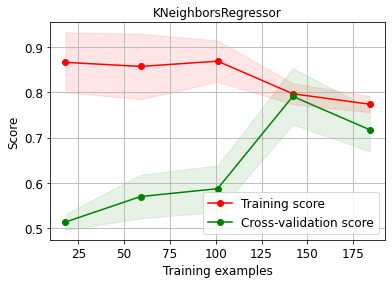

In [70]:
Score=[]
CVS=[]
MODEL=[]
for name,model in models.items():
  print("***************************************************",name,"************************************************************")
  MODEL.append(name)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('\n')
  ac=accuracy_score(y_test,y_pred)
  Score.append(ac)
  print("Accuracy_Score",ac)
  print('\n')
  print("SCORE",model.score(X_test,y_test))
  print("\n")
  cm=confusion_matrix(y_test,y_pred)
  print('Confusion metrics')
  print('\n')
  print(cm)
  print("CLASSIFICATION REPORT")
  report=classification_report(y_test,y_pred)
  print('\n')
  print(report)
  csv=cross_val_score(model,X_train,y_train,cv=skf).mean()
  CVS.append(csv*100)
  print("Cross_Val_Score",csv)
  print('\n')
  
  print("MODEL LEARNING CURVE")
  skplt.estimators.plot_learning_curve(model,X_new,y_new,cv=skf,scoring='accuracy',text_fontsize='large',title=name)
  plt.show()

I will choose ExtraTrees because i am gettinf good accuracy and cross val score and good roc_auc
Accuracy_Score 0.9621621621621622



Accuracy_Score 0.9621621621621622

SCORE 0.9621621621621622

Confusion metrics

[[355 14] [ 14 357]] CLASSIFICATION REPORT

          precision    recall  f1-score   support

     0.0       0.96      0.96      0.96       369
     1.0       0.96      0.96      0.96       371

accuracy                           0.96       740
macro avg 0.96 0.96 0.96 740 weighted avg 0.96 0.96 0.96 740

Cross_Val_Score 0.9455323783195109

In [50]:
ETREE=ExtraTreesClassifier()
ETREE.fit(X_train,y_train)

ExtraTreesClassifier()

In [51]:
param={
 'bootstrap': [False,True],
 'criterion': ['gini','entropy'],
 'max_depth': [None,1,2,3],
 'max_leaf_nodes': [None,1,2,3],
 'max_samples': [None,1,2,3],
 'n_estimators':[100,200,300]
}
skfs=StratifiedKFold(n_splits=7)
grid=GridSearchCV(estimator=ETREE,param_grid=param,cv=skfs,n_jobs=-1)
grid.fit(X_new,y_new)

GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
             estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False, True],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 1, 2, 3],
                         'max_leaf_nodes': [None, 1, 2, 3],
                         'max_samples': [None, 1, 2, 3],
                         'n_estimators': [100, 200, 300]})

In [52]:
grid.best_score_

0.974025974025974

In [53]:
grid.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'n_estimators': 200}

# Now i am just putting values to now know about model performance to see metrics also

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

In [72]:
final_model=ExtraTreesClassifier(bootstrap= False,
 criterion= 'gini',
 max_depth= None,
 max_leaf_nodes= None,
 max_samples= None)
final_model.fit(X_train,y_train)

ExtraTreesClassifier()

In [73]:
y_pred1=final_model.predict(X_test)

MODEL LEARNING CURVE


<Figure size 864x576 with 0 Axes>

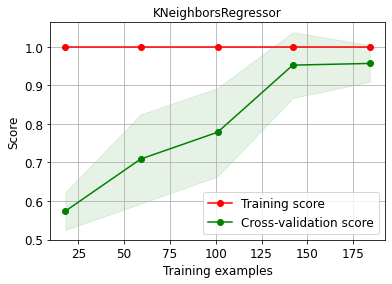

In [78]:
plt.figure(figsize=(12,8))
print("MODEL LEARNING CURVE")
skplt.estimators.plot_learning_curve(final_model,X_new,y_new,cv=skf,scoring='accuracy',text_fontsize='large',title=name)
plt.show()

# Final  model metrics

In [80]:
print("Accuracy Score",accuracy_score(y_test,y_pred1))
print("Confusion matrix")
print('\n')
print(confusion_matrix(y_test,y_pred1))
print("CLASSIFICATION REPORT")
print('\n')
print(classification_report(y_test,y_pred1))

Accuracy Score 0.927536231884058
Confusion matrix


[[33  3]
 [ 2 31]]
CLASSIFICATION REPORT


              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93        36
         1.0       0.91      0.94      0.93        33

    accuracy                           0.93        69
   macro avg       0.93      0.93      0.93        69
weighted avg       0.93      0.93      0.93        69



# Saving the "grid search model" as my main model

In [85]:
import joblib
joblib.dump(grid,'HR.obj')

['HR.obj']

# Loading model

In [86]:
model=joblib.load('HR.obj')

In [87]:
model.predict(X_test)

array([1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       0.])

# Conclusion

1. in this dataset there were 35 columns and 5 rows.

2. I did EDA to understand the attrition for all features

3. The data was imbalanced so i used smote because it balance the data synthetically so no rows repeat randomly.and then build multiple models where EXTRATREES was giving me good accuracy.

  4. Then i did hyperparameter tuning and increase the Cross val score.

5. And finally built a model the can predict the attrition with 97.40% accuracy.